In [1]:
import pandas as pd
import numpy as np

In [2]:
#import the dataset
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#checking null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.shape

(545, 13)

## Data Preparation

#### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [5]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(df['furnishingstatus'])

In [6]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [7]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [8]:
# Add the results to the original housing dataframe

df = pd.concat([df, status], axis = 1)

In [9]:
# Now let's see the head of our dataframe.

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,0


In [10]:
# Drop 'furnishingstatus' as we have created the dummies for it

df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0,0


In [18]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.copy()
y=X.pop('price')

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=100, train_size=0.7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 13)
(381,)
(164, 13)
(164,)


## Building Model

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dt=DecisionTreeRegressor(max_depth=4, random_state=42, min_samples_leaf=10)

In [24]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

Plotting decision tree

In [25]:
#Snippet to take your decision tree graph into an object and make an image from it.

#Libraries to plot the decision tree graph

from IPython.display import Image    #For any given structure you can draw an image
from six import StringIO
from sklearn.tree import export_graphviz  #graphviz object is what we plot as a graph.
import pydotplus, graphviz

In [26]:
#Function to plot a decision tree

def get_dt_graph(dt_classifier):
    #1. Instantiate a string dot data file
    dot_data=StringIO()

    #2. Create a graphviz object and put it into the dot file
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, 
                   class_names=['No Disease', 'Disease'])

    #Using the graphviz object, want to create a graph
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [38]:
#Function to evaluate a model
from sklearn.metrics import r2_score
def eval_model(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    
    print('Train evaluation')
    print(r2_score(y_train, y_train_pred))

    print('-----------------------------------------------')
    print('Test evaluation')
    print(r2_score(y_test, y_test_pred))

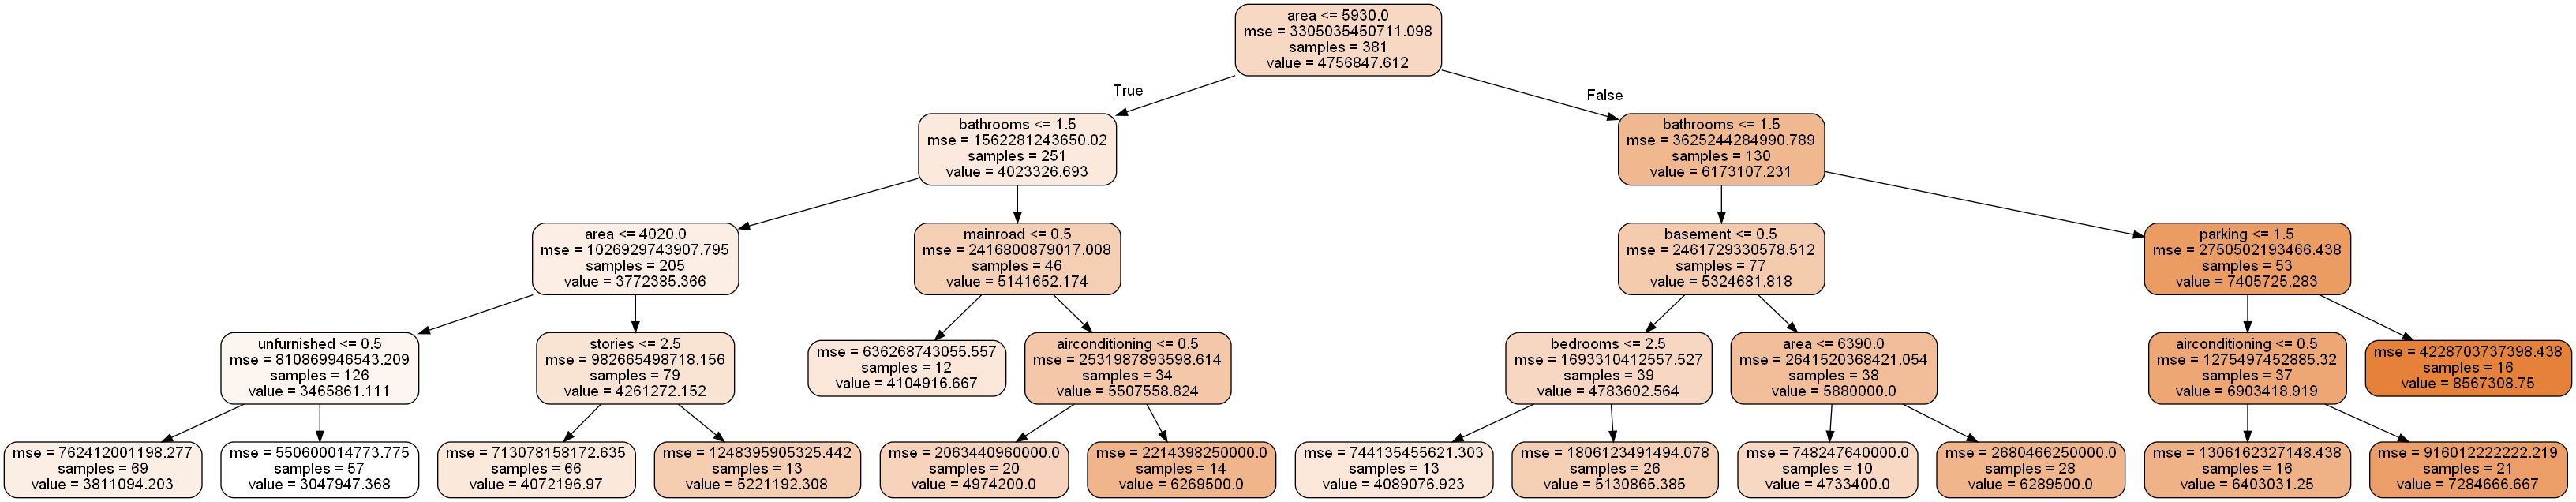

In [39]:
graph=get_dt_graph(dt)
Image(graph.create_png())

In [40]:
eval_model(dt)

Train evaluation
0.6234560022579934
-----------------------------------------------
Test evaluation
0.5289772624972268


The evaluation in train and test sets are shown to be low since hyperparameter tuning is not performed.

### Hyper parameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
dt6=DecisionTreeRegressor(random_state=42)

In [114]:
params={
    'max_leaf_nodes': [5,6,7,8,9,10],
    'max_depth': [4,8,10,15],
    'criterion' : ['mse']
    }

In [115]:
grid_search=GridSearchCV(estimator=dt6,
            param_grid=params,
            cv=4
            )

In [116]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['mse'], 'max_depth': [4, 8, 10, 15],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10]})

In [117]:
dt_best=grid_search.best_estimator_
dt_best

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=10, random_state=42)

In [118]:
eval_model(dt_best)

Train evaluation
0.6036430866552607
-----------------------------------------------
Test evaluation
0.4756007638005172
